## Aplicación de regresión logistica en el dataset de NBA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [16]:
# Carga el dataset con los headers originales
df = pd.read_csv('nba.txt', sep=' ', comment='#', header=0)

# Renombra los headers
new_headers = {
    'G': 'Juegos_participo',
    'GS': 'Juegos_inicio',
    'MPG': 'Minutos_por_partido',
    'FG%': 'Porcentaje_acierto_tiro',
    '3p%': 'Porcentaje_tiro_tres_puntos',
    'FT%': 'Porcentaje_tiros_libres',
    'OFF': 'Rebotes_ofensivos',
    'DEF': 'Rebotes_defensivos_por_juego',
    'RPG': 'Rebotes_totales_por_juego',
    'APG': 'Asistencias_por_partido',
    'SPG': 'Robos_por_juego',
    'BPG': 'Bloqueos_por_juego',
    'TO': 'Perdidas_balon_por_partido',
    'PF': 'Faltas_por_partido',
    'PPG': 'Puntos_por_partido',
    'Class': 'Class'
}

df = df.rename(columns=new_headers)
print(df.head())

   Juegos_participo  Juegos_inicio  Minutos_por_partido   
0               362            223                 24.4  \
1                19              0                 11.9   
2              1148           1140                 36.9   
3               466            170                 19.8   
4                38              1                  9.5   

   Porcentaje_acierto_tiro  Porcentaje_tiro_tres_puntos   
0                    0.466                        0.405  \
1                    0.273                        0.298   
2                    0.452                        0.400   
3                    0.482                        0.284   
4                    0.381                        0.292   

   Porcentaje_tiros_libres  Rebotes_ofensivos  Rebotes_defensivos_por_juego   
0                    0.800                0.6                           2.1  \
1                    0.970                0.1                           1.1   
2                    0.894                1.0        

### Numero de instancias y atributos

In [17]:
# Numero de instancias y atributos
print("El numero de instancias es: ", df.shape[0])
print("El numero de atributos es: ", df.shape[1])

El numero de instancias es:  308
El numero de atributos es:  16


### ¿El conjunto de datos está etiquetado? ¿Cuántas clases tiene el conjunto de datos?

In [18]:
# ¿El conjunto de datos está etiquetado? ¿Cuántas clases tiene el conjunto de datos?
print("El conjunto de datos esta etiquetado")

print("Las clases que tiene el conjunto de datos son: ", df['Class'].unique())

El conjunto de datos esta etiquetado
Las clases que tiene el conjunto de datos son:  [1 2]


### ¿Cuántos atributos son numéricos y cuántos categóricos?

In [19]:
dfcat = df.copy()
mapping = {1: 'Perimetral', 2: 'Interno'}
dfcat['Class'] = pd.Categorical(dfcat['Class'].map(mapping))
# ¿Cuántos atributos son numéricos y cuántos categóricos? (sumandolos)
print("El numero de atributos numericos es: ", dfcat.select_dtypes(include=np.number).shape[1])
print("El numero de atributos categoricos es: ", dfcat.select_dtypes(include=['category']).shape[1])

El numero de atributos numericos es:  15
El numero de atributos categoricos es:  1


### Reporte la moda para cada atributo categórico.

In [20]:
# Reporte la moda para cada atributo categórico (sumando los atributos categóricos)
print("La moda para cada atributo categorico es: ")
dfcat.select_dtypes(include=['category','object']).mode().T.rename(columns={0:'Moda'})

La moda para cada atributo categorico es: 


,Moda
Class,Perimetral


###	Reporte la media, rango y desviación estándar para cada atributo numérico.

In [21]:
# Reporte la media, rango y desviación estándar para cada atributo numérico

describedf = dfcat.describe()
describedf.loc['range'] = describedf.loc['max'] - describedf.loc['min']
describedf.loc['std'] = describedf.loc['std'].round(2)
# Show only range and min
describedf.loc[['mean','range','std']].T.rename(columns={'mean':'Media','range':'Rango','std':'Desviacion estandar'})


,Media,Rango,Desviacion estandar
Juegos_participo,342.905844,1313.000,285.66
Juegos_inicio,194.496753,1302.000,246.89
Minutos_por_partido,21.941558,33.200,8.15
Porcentaje_acierto_tiro,0.449932,0.377,0.06
Porcentaje_tiro_tres_puntos,0.246237,1.000,0.16
Porcentaje_tiros_libres,0.728854,1.000,0.13
Rebotes_ofensivos,1.015909,3.800,0.80
Rebotes_defensivos_por_juego,2.601623,9.000,1.49
Rebotes_totales_por_juego,3.619481,12.500,2.20
Asistencias_por_partido,2.123377,9.800,1.92


### Determine el número de valores faltantes para cada atributo.

In [22]:
# Determine el número de valores faltantes para cada atributo
dfcat.isnull().sum()

Juegos_participo                0
Juegos_inicio                   0
Minutos_por_partido             0
Porcentaje_acierto_tiro         0
Porcentaje_tiro_tres_puntos     0
Porcentaje_tiros_libres         0
Rebotes_ofensivos               0
Rebotes_defensivos_por_juego    0
Rebotes_totales_por_juego       0
Asistencias_por_partido         0
Robos_por_juego                 0
Bloqueos_por_juego              0
Perdidas_balon_por_partido      0
Faltas_por_partido              0
Puntos_por_partido              0
Class                           0
dtype: int64

### Determine la distribución de las clases.

In [23]:
# Determine la distribución de las clases
dfcat['Class'].value_counts(normalize=True).apply(lambda x: format(x, '.2%') )

Class
Perimetral    63.96%
Interno       36.04%
Name: proportion, dtype: object

C:\Users\e404n\AppData\Local\Temp\ipykernel_14504\3231512702.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=15)


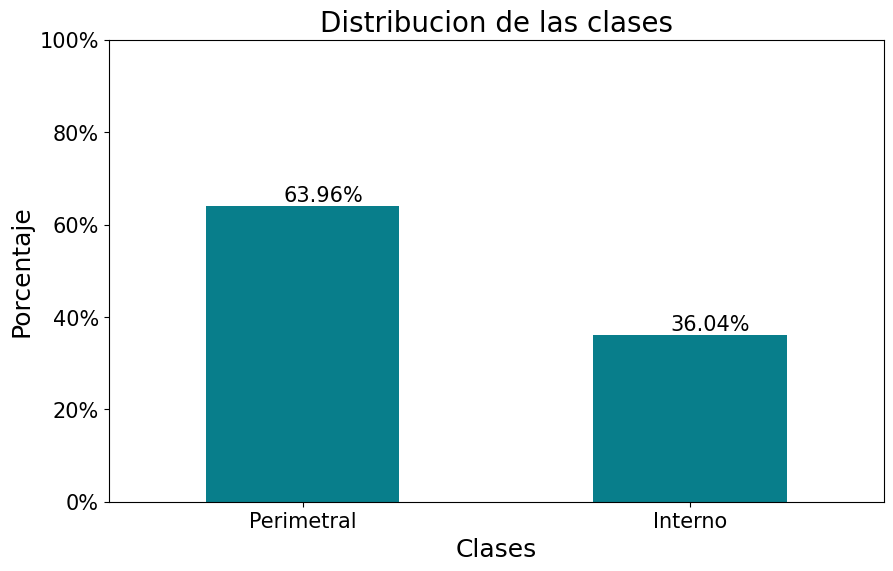

In [24]:
# Grafica de la distribucion de las clases con porcentaje en los ejes y labels
ax = dfcat['Class'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Distribucion de las clases', fontsize=20)
ax.set_xlabel('Clases', fontsize=18)
ax.set_ylabel('Porcentaje', fontsize=18)
ax.set_xticklabels(['Perimetral', 'Interno'], rotation='horizontal', fontsize=15)
ax.set_ylim(0, 1)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=15)
for i in ax.patches:
    ax.text(i.get_x() + 0.2, i.get_height() + 0.01, str(round((i.get_height() * 100), 2)) + '%', fontsize=15)
plt.show()


### Determine si existen atípicos de los datos

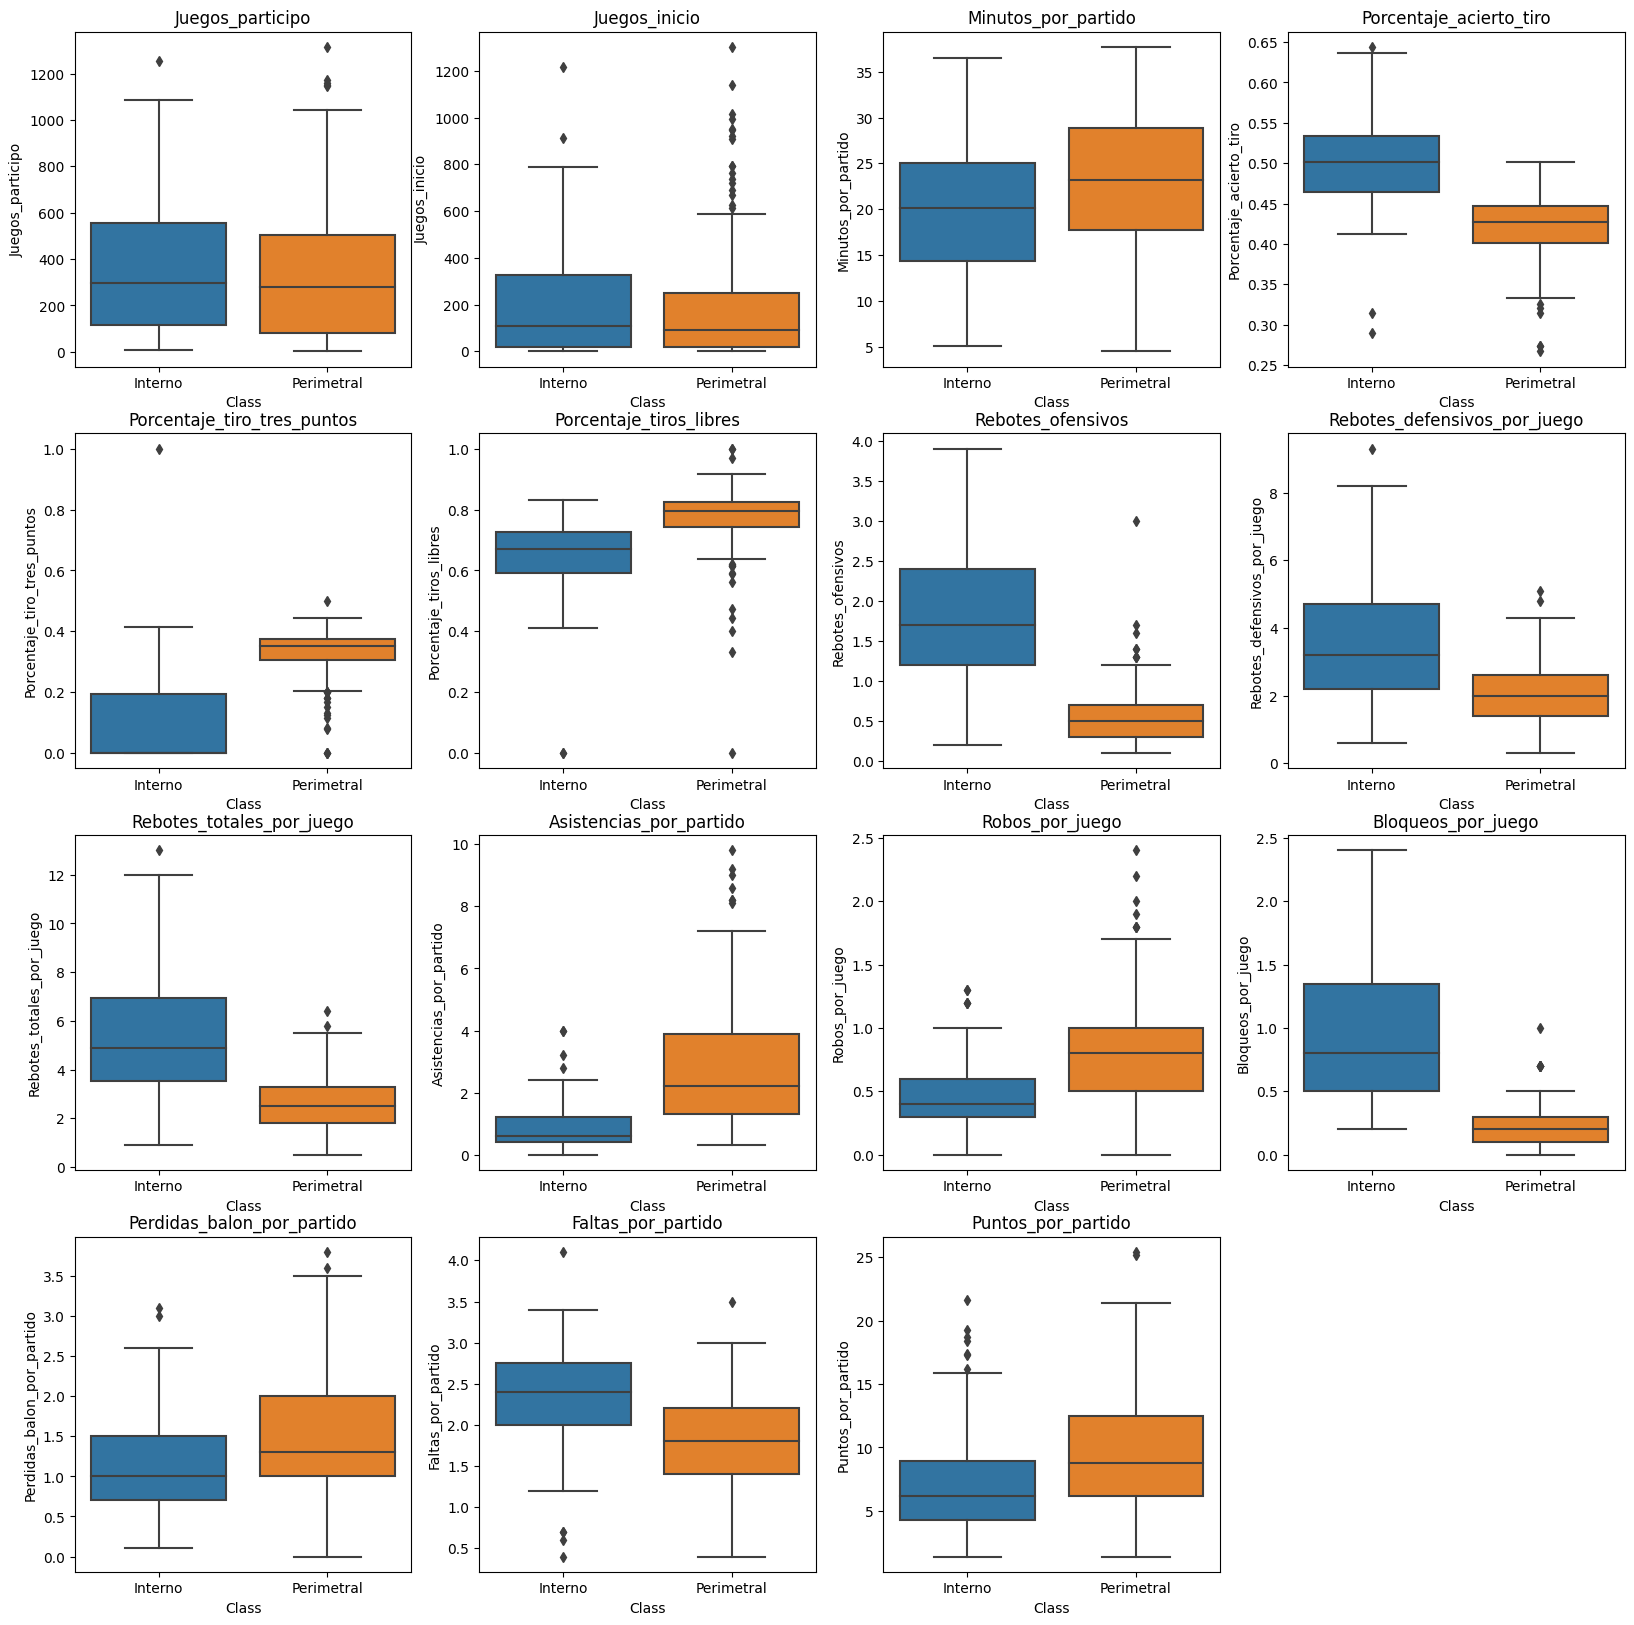

In [25]:
# Determine si existen atípicos de los datos utilizando matriz de boxplot un grafico para cada atributo exeptuando el atributo llamado class con un titulo para cada grafico pero en una matriz de 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(dfcat.columns) - 1:
        sns.boxplot(x='Class', y=dfcat.columns[i], data=dfcat, ax=ax)
        ax.set_title(dfcat.columns[i])
    else:
        ax.set_axis_off()
plt.show()

### Matriz de correlación

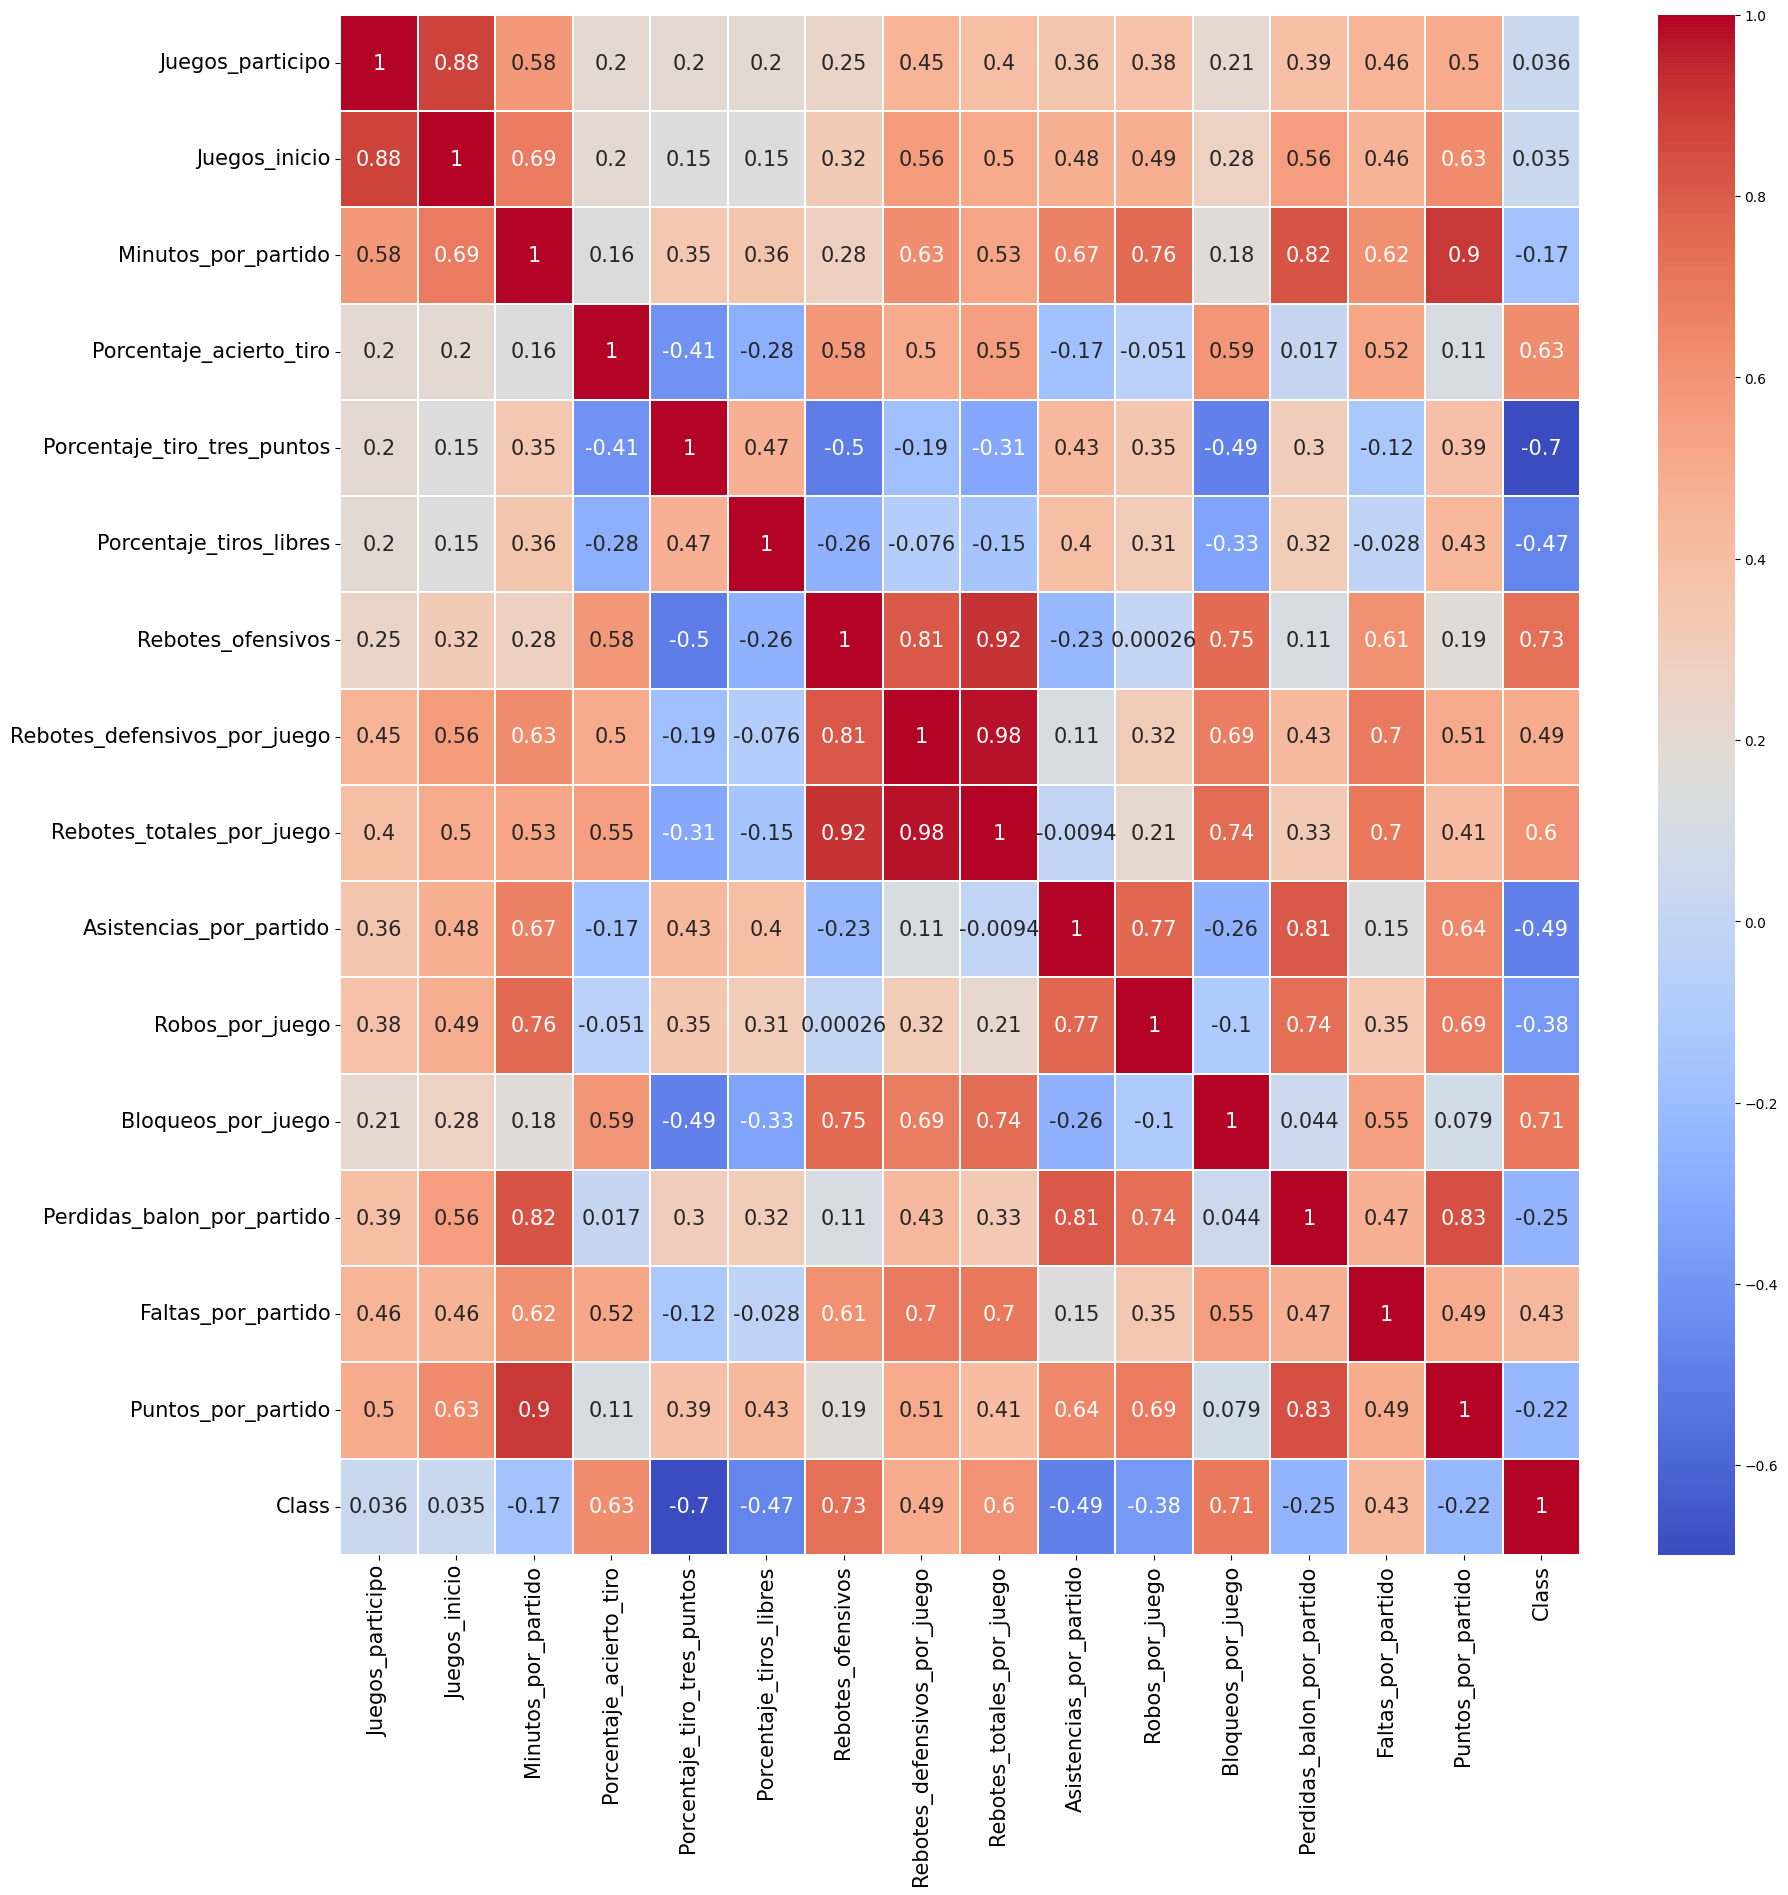

In [36]:
# Matriz de correlación entre todas las variables
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Aplique al menos dos estrategias diferentes para manejar los datos faltantes.

In [ ]:
# Aplique al menos dos estrategias diferentes para manejar los datos faltantes.

# Eliminar las filas con datos faltantes
dfcat.dropna(inplace=True)
# Reemplazar los datos faltantes con la media de la columna
df.fillna(df.mean(), inplace=True)

### Convierta todas los atributos numéricos a categóricos utilizando dos estrategias diferentes.

In [ ]:
# Convierta todas los atributos numéricos a categóricos utilizando dos estrategias diferentes.
df_categorico = dfcat.copy()

# Convertir los atributos numéricos a categóricos utilizando el método de discretización por anchura de intervalo con un bucle
for col in df_categorico.columns:
    if df_categorico[col].dtype != 'object' and df_categorico[col].dtype != 'category':
        df_categorico[col] = pd.cut(df_categorico[col], bins=3, labels=['Bajo', 'Medio', 'Alto'])

df_categorico

In [ ]:
df_KBinsDiscretizer = dfcat.copy()

from sklearn.preprocessing import KBinsDiscretizer

# Seleccionar las columnas numéricas
numeric_cols = df_KBinsDiscretizer.select_dtypes(include='number').columns.tolist()

# Crear un objeto KBinsDiscretizer y transformar los datos
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_KBinsDiscretizer[numeric_cols] = discretizer.fit_transform(df[numeric_cols])

def map_discrete_values(x):
    if x == 0:
        return 'Bajo'
    elif x == 1:
        return 'Medio'
    else:
        return 'Alto'

# Aplicar la función al dataframe
df_KBinsDiscretizer[numeric_cols] = df_KBinsDiscretizer[numeric_cols].applymap(map_discrete_values)

df_KBinsDiscretizer

### Transforme el conjunto de datos de manera que todos los atributos sean numéricos.

In [ ]:
#Transforme el conjunto de datos de manera que todos los atributos sean numéricos.
df_numerico = df_KBinsDiscretizer.copy()

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_numerico[numeric_cols] = discretizer.fit_transform(df[numeric_cols])

df_numerico

### Escoja una técnica para la detección de datos atípicos y aplíquela sobre el conjunto de datos.

In [ ]:
# Determine si existen atípicos de los datos utilizando intercuartiles

# Estadísticas descriptivas de las columnas numéricas
stats = df.describe()

# Calcular los límites del rango intercuartil
q1 = stats.loc['25%']
q3 = stats.loc['75%']
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identificar valores atípicos en cada columna
for col in df.columns:
    if df[col].dtype != 'object':
       print(df[(df[col] < lower_limit[col]) | (df[col] > upper_limit[col])][col])

### 6.	Aplicar el Modelo Regresión Lineal / Logística  y evaluar el desempeño del modelo.

In [ ]:
# Aplicar el Modelo Regresión Logística  y evaluar el desempeño del modelo.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_lo = df.copy()

# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X = df_lo.drop('Class', axis=1)
y = df_lo['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un objeto LogisticRegression
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy*100, "%")

In [ ]:
# Aplicar el Modelo Regresión LINEAL  y evaluar el desempeño del modelo.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un objeto LinearRegression
linreg = LinearRegression()

# Entrenar el modelo
linreg.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = linreg.predict(X_test)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred.round())

print("Accuracy: ", accuracy*100, "%")